## 📌 Understanding Missing Values

### 🔹 Types of Missing Values
- **Unknown**: Values not recorded or completely absent.  
- **Blank**: Fields intentionally left empty.  
- **Undefined**: Values that do not apply to a specific case or context.  

---

### 🔹 Three Main Types of Missing Data
1. **MCAR (Missing Completely at Random)**  
   - Missingness is entirely random and not related to any observed or unobserved data.  

2. **MAR (Missing at Random)**  
   - Missingness is related to observed data, but not to the missing values themselves.  

3. **MNAR (Missing Not at Random)**  
   - Missingness is related to the missing value itself, which can lead to bias.  

---

### 🔹 How Missing Values Affect Data Analysis
- **📉 Reduces Data Quality** → Incomplete datasets can produce unreliable conclusions.  
- **⚖️ Biases Results** → Patterns in missing data can skew interpretations.  
- **📊 Statistical Errors** → Many statistical methods assume complete data.  
- **🔻 Loss of Power** → Removing data decreases sample size and statistical power.  

---

### 🔹 Strategies for Handling Missing Values

#### 1. **Deletion**
- Remove rows or columns with missing values.  
- Be cautious—valuable data may be lost.  

#### 2. **Imputation**
- **Mean / Median / Mode** → Simple replacement for numeric or categorical data.  
- **Predictive Modeling** → Use algorithms to estimate missing values.  

#### 3. **Advanced Techniques**
- **Multiple Imputation** → Create several plausible datasets and combine results.  
- **K-Nearest Neighbors (KNN)** → Estimate values from nearest neighbors.  


**----------Define Missing values----------**

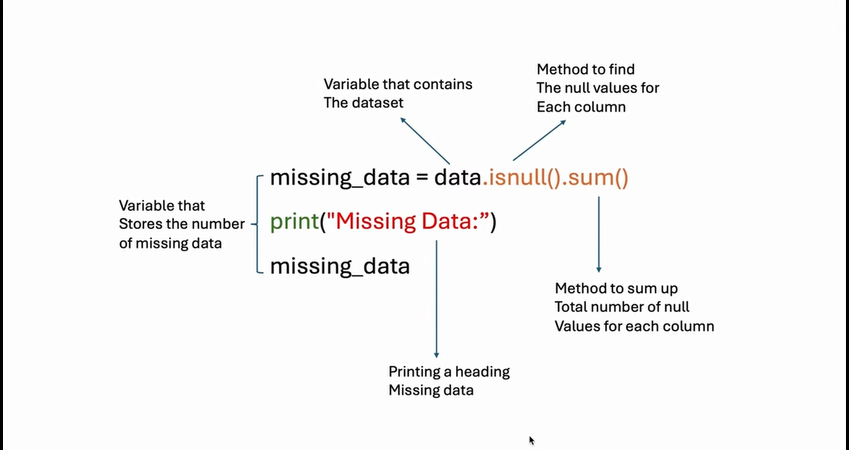

In [ ]:
import pandas as pd
data = pd.read_excel('/content/customer_data.xlsx')
data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [ ]:
missing_data = data.isnull().sum()
print("missing data")
missing_data

missing data


,0
CustomerID,0
Gender,0
Age,0
Income,5
City,3
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


 **----------Imputing Missing Values----------**


## 🔹 Types of Imputation

1. **Deletion**  
   - ❌ Permanently removes data from the dataset.  
   - ⚠️ Can lead to loss of valuable information and reduced sample size.  

2. **Imputation**  
   - ✅ Preserves patterns and relationships within the data.  
   - 📊 Maintains dataset completeness for better analysis.  

3. **Real-World Data**  
   - 🌍 Rarely perfect; missing values are common in practice.  
   - 🎯 Effective imputation techniques are essential for accuracy.  

---

## 🔹 Types of Imputation Techniques

### 1️⃣ **Simple Imputation**

**Mean Imputation**  
- 🔄 Replace missing values with the **mean** of the available data in that column.  
- 📈 Best for **normally distributed numerical** data.  

**Median Imputation**  
- 🔄 Replace missing values with the **median** of the available data.  
- 🛡️ More robust to outliers — great for **skewed distributions**.  

**Mode Imputation**  
- 🔄 Replace missing values with the **mode** (most frequent value) in that column.  
- 🏷️ Best for **categorical** data where the most common category is a reasonable substitute.  


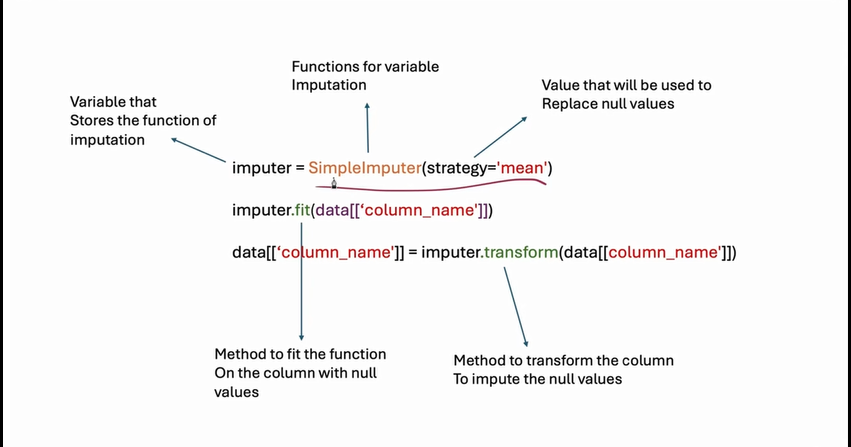

In [ ]:
#impoert Library
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='median')
#numeric data - mean,median
#categorical data - most_frequent
imputer.fit(data[['Income']])
data[['Income']] = imputer.transform(data[['Income']])

In [ ]:
imputer_2 = SimpleImputer(strategy='most_frequent')
#numeric data - mean,median
#categorical data - most_frequent
imputer_2.fit(data[['City']])
data[['City']] = imputer_2.transform(data[['City']])

In [ ]:
missing_data = data.isnull().sum()
print("missing data")
missing_data

missing data


,0
CustomerID,0
Gender,0
Age,0
Income,0
City,0
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


In [ ]:
data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,4.125200e+01,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,6.732900e+01,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,5.276300e+01,1,Online,2022-09-23,No
...,...,...,...,...,...,...,...,...,...,...,...,...
76,C077,Female,38,94266.0,Los Angeles,Midwest,5,6.308200e+01,XXXX,Online,2023-01-02,No
77,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No
78,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes
79,C080,Female,26,43931.0,Los Angeles,Northeast,9,9.153600e+01,2,In-store,2023-09-18,No


**----------Data Types in a DataFrame----------**

In a DataFrame, each column has a **data type** that determines how the data is stored and processed.  
Below are the most common data types in **Pandas**:

---

## 1️⃣ **int64**  
- **📝 Description**: 64-bit integer (whole numbers).  
- **📌 Usage**: For numeric values without decimals (positive or negative).  
- **💡 Examples**: Counts, IDs, quantities.  

---

## 2️⃣ **float64**  
- **📝 Description**: 64-bit floating-point numbers (decimals).  
- **📌 Usage**: For values requiring precision.  
- **💡 Examples**: Prices, measurements, percentages.  

---

## 3️⃣ **object**  
- **📝 Description**: Strings or mixed data types.  
- **📌 Usage**: For text or non-numeric data.  
- **💡 Examples**: Names, addresses, categories.  

---

## 4️⃣ **bool**  
- **📝 Description**: Boolean values (`True` / `False`).  
- **📌 Usage**: For binary states or flags.  
- **💡 Examples**: Yes/No fields, pass/fail conditions.  

---

## 5️⃣ **datetime64**  
- **📝 Description**: Date and time values.  
- **📌 Usage**: For storing and manipulating timestamps.  
- **💡 Examples**: Event dates, transaction timestamps.  


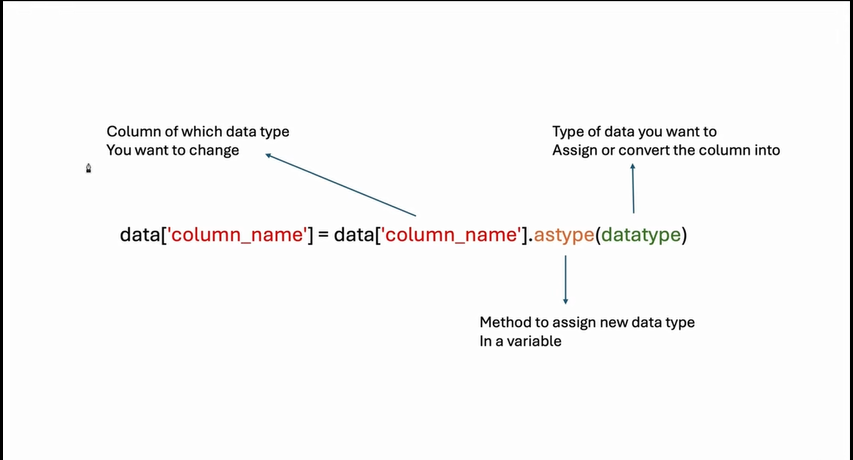

In [ ]:
data.dtypes

,0
CustomerID,object
Gender,object
Age,int64
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,object
Purchase_Channel,object


In [ ]:
#change data type
data['Age'] = data['Age'].astype('str')

In [ ]:
data.dtypes

,0
CustomerID,object
Gender,object
Age,object
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,object
Purchase_Channel,object


In [ ]:
data['Age'] = data['Age'].astype('int')

In [ ]:
data.dtypes

,0
CustomerID,object
Gender,object
Age,int64
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,object
Purchase_Channel,object


 **----------Understanding Inconsistent Values----------**

---

## 🔹 Causes of Inconsistent Values

1. **🖊️ Human Entry Error**  
   - Typos, incorrect formatting, or accidental input mistakes.  

2. **⚖️ Lack of Standardization**  
   - Different conventions across datasets (e.g., `"USA"` vs `"United States"`).  

3. **🔗 Merging Data from Multiple Sources**  
   - Variations in formats and naming when combining datasets from different origins.  

4. **❓ Ambiguous Data Fields**  
   - Poorly defined fields lead to varied interpretations  
     (e.g., `"Status"` = `"Active"`, `"Inactive"`, `"N/A"`).  

---

## 🔹 Real-World Impacts of Inconsistent Values

1. **📊 Inaccurate Reporting**  
   - Leads to misleading insights and wrong conclusions.  

2. **📉 Broken Grouping in Dashboards**  
   - Incorrect aggregations and visualizations affect decision-making.  

3. **🤖 Poor Model Performance in AI/ML**  
   - Reduces model accuracy and prediction quality.  

4. **💰 Increased Cleaning Cost**  
   - More time and resources needed for standardization.  

---

## 🔹 Types of Inconsistent Values

1. **📅 Format Inconsistencies**  
   - Different date formats (e.g., `MM/DD/YYYY` vs `DD-MM-YYYY`).  

2. **🗂️ Semantic Inconsistencies**  
   - Multiple ways to represent the same value  
     (e.g., `"NY"`, `"New York"`, `"N.Y."`).  

3. **✏️ Spelling and Case Errors**  
   - Typos or inconsistent capitalization  
     (e.g., `"color"`, `"Colour"`, `"COLR"`).  

4. **⚠️ Logical Contradictions**  
   - Data that doesn’t make logical sense  
     (e.g., `Age = 5` and `Marital Status = Married`).  


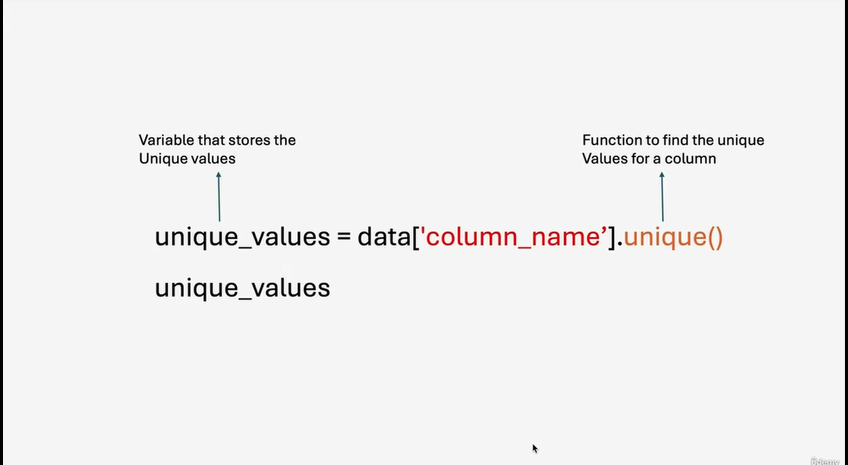

In [ ]:
unique_values = data['Customer_Lifespan_Months'].unique()
unique_values

array([3, 4, 1, 2, 5, 'XXXX'], dtype=object)

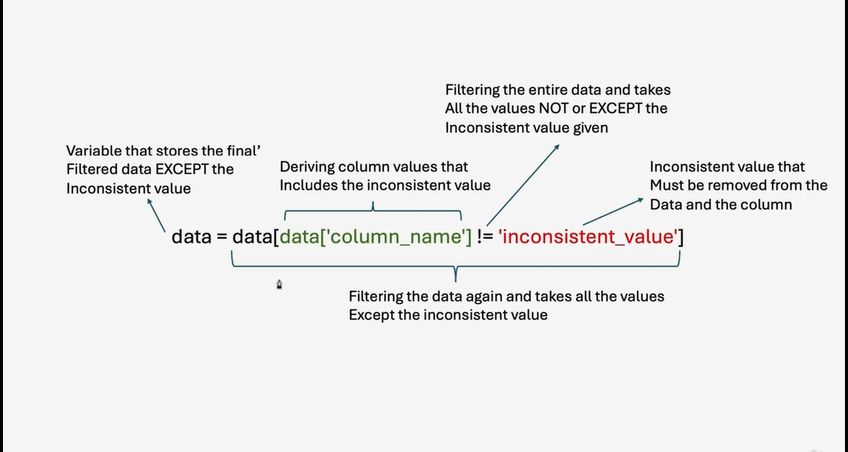

In [ ]:
data = data[data['Customer_Lifespan_Months'] != 'XXXX']

In [ ]:
data['Customer_Lifespan_Months'].unique()

array([3, 4, 1, 2, 5], dtype=object)

In [ ]:
data['Customer_Lifespan_Months'] = data['Customer_Lifespan_Months'].astype(int)

/tmp/ipython-input-1551412312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Customer_Lifespan_Months'] = data['Customer_Lifespan_Months'].astype(int)


In [ ]:
data['Date_of_Purchase'] = data['Date_of_Purchase'].astype('datetime64[ns]')

/tmp/ipython-input-79812827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date_of_Purchase'] = data['Date_of_Purchase'].astype('datetime64[ns]')


In [ ]:
data.dtypes

,0
CustomerID,object
Gender,object
Age,int64
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,int64
Purchase_Channel,object


In [ ]:
data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


**----------Understanding Duplicate Values----------**

---

## 🔹 Types of Duplicates

1. **📝 Full Duplicates**  
   - Rows that are **completely identical** across all columns.  
   - 💡 *Example*: Two identical customer records with the same name, email, and address.  

2. **🔍 Partial Duplicates**  
   - Rows with identical values in **certain key columns**, but differences in others.  
   - 💡 *Example*: Same customer name but different purchase records.  

---

## 🔹 Causes of Duplicate Values

1. **✏️ Manual Data Entry**  
   - Typing errors or accidental repeated entries.  

2. **📥 Data Collection Errors**  
   - Repeated form submissions or faulty data capture.  

3. **🔗 Merging Datasets**  
   - Combining multiple datasets without duplicate checks.  

4. **⚙️ System Glitches or Sync Failures**  
   - Technical issues that cause records to be saved multiple times.  

---

## 🔹 Problems Caused by Duplicate Values

1. **📊 Skewed Analysis**  
   - Inflates counts, averages, and totals, producing misleading statistics.  

2. **⚠️ Incorrect Insights**  
   - Decisions based on duplicated data can be wrong or harmful.  

3. **❌ Poor Data Quality**  
   - Reduces the integrity and trustworthiness of the dataset.  

4. **💾 Increased Storage & Cost**  
   - Unnecessary data storage leads to higher costs and inefficiency.  


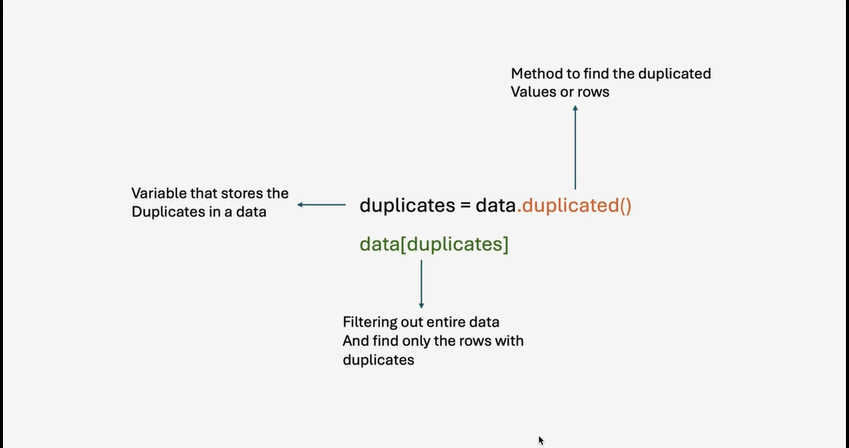

In [ ]:
duplicates = data.duplicated()
data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
80,C021,Female,22,41743.0,Los Angeles,Northeast,4,54.599,1,Online,2023-06-08,No


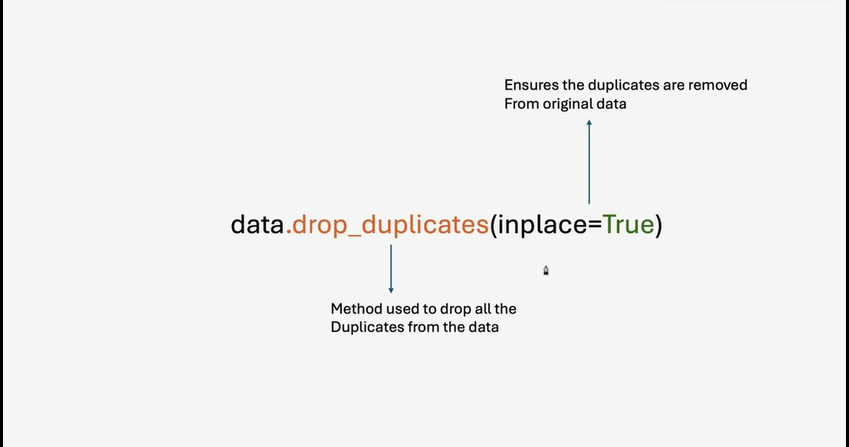

In [ ]:
data.drop_duplicates(inplace=True)
data

/tmp/ipython-input-213383468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,4.125200e+01,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,6.732900e+01,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,5.276300e+01,1,Online,2022-09-23,No
...,...,...,...,...,...,...,...,...,...,...,...,...
74,C075,Female,42,58033.0,Los Angeles,Northeast,4,5.798400e+01,1,Online,2023-05-13,No
75,C076,Male,44,59659.0,Houston,Midwest,14,1.345400e+02,4,Online,2023-12-25,Yes
77,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No
78,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes


In [ ]:
duplicates = data.duplicated()
data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status


**----------Understanding Data Sorting and Ordering----------**

---

## 🔹 Why is Sorting Data Important?

1. **📖 Improve Data Readability**  
   - Makes data easier to read and understand for analysis.  

2. **📊 Enables Better Comparison**  
   - Helps quickly identify trends and patterns between values.  

3. **🏆 Critical for Ranking and Grouping**  
   - Used for rankings (e.g., top sales, highest scores) and grouping similar items.  

4. **🔍 Useful in Filtering and Analysis**  
   - Makes it easier to filter and analyze specific subsets.  

5. **📑 Essential for Reporting**  
   - Well-ordered data improves clarity and professionalism in reports.  

---

## 🔹 Types of Sorting

1. **⬆️ Ascending Order**  
   - From **smallest → largest** (A → Z, 0 → 9).  
   - 💡 *Example*: Names alphabetically, numbers from low to high.  

2. **⬇️ Descending Order**  
   - From **largest → smallest** (Z → A, 9 → 0).  
   - 💡 *Example*: Sales from highest to lowest, dates from newest to oldest.  


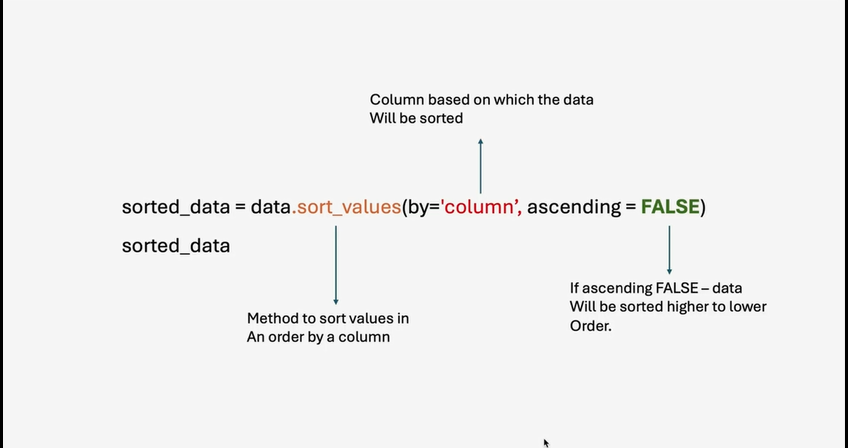

In [ ]:
sorted_data = data.sort_values(by='Income',ascending=False)
sorted_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
55,C056,Female,29,107662.0,Houston,Northeast,3,47.877,1,In-store,2022-02-11,No
22,C023,Female,41,105186.0,Los Angeles,Midwest,14,137.697,4,Online,2023-07-15,Yes
70,C071,Female,36,103264.0,Los Angeles,Northeast,11,117.394,3,Online,2023-12-22,Yes
32,C033,Female,31,98590.0,Houston,West,7,76.114,2,Online,2023-06-30,No
52,C053,Female,45,90860.0,Houston,Northeast,10,105.287,3,In-store,2023-12-29,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
49,C050,Female,39,29104.0,Houston,Midwest,7,84.461,2,Online,2022-03-17,No
10,C011,Female,53,27958.0,Los Angeles,Midwest,10,98.449,3,In-store,2023-07-16,Yes
23,C024,Male,54,27660.0,New York,Midwest,12,125.763,3,Online,2023-07-11,Yes


**----------Data Slicing----------**

---

## 🔹 Why is Data Slicing Important?

1. **⚡ Efficient Analysis**  
   - Work with smaller, relevant subsets of data for faster and more manageable analysis.  

2. **🎯 Customized Views**  
   - Focus on specific segments or criteria of interest.  

3. **🔍 Data Exploration**  
   - Isolate specific rows or columns to identify trends, patterns, or anomalies.  

4. **🤖 Input to Models**  
   - Use only relevant features and observations in machine learning models.  

5. **🚀 Improved Code Performance**  
   - Smaller datasets reduce computational load and speed up processing times.  




In [ ]:
data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


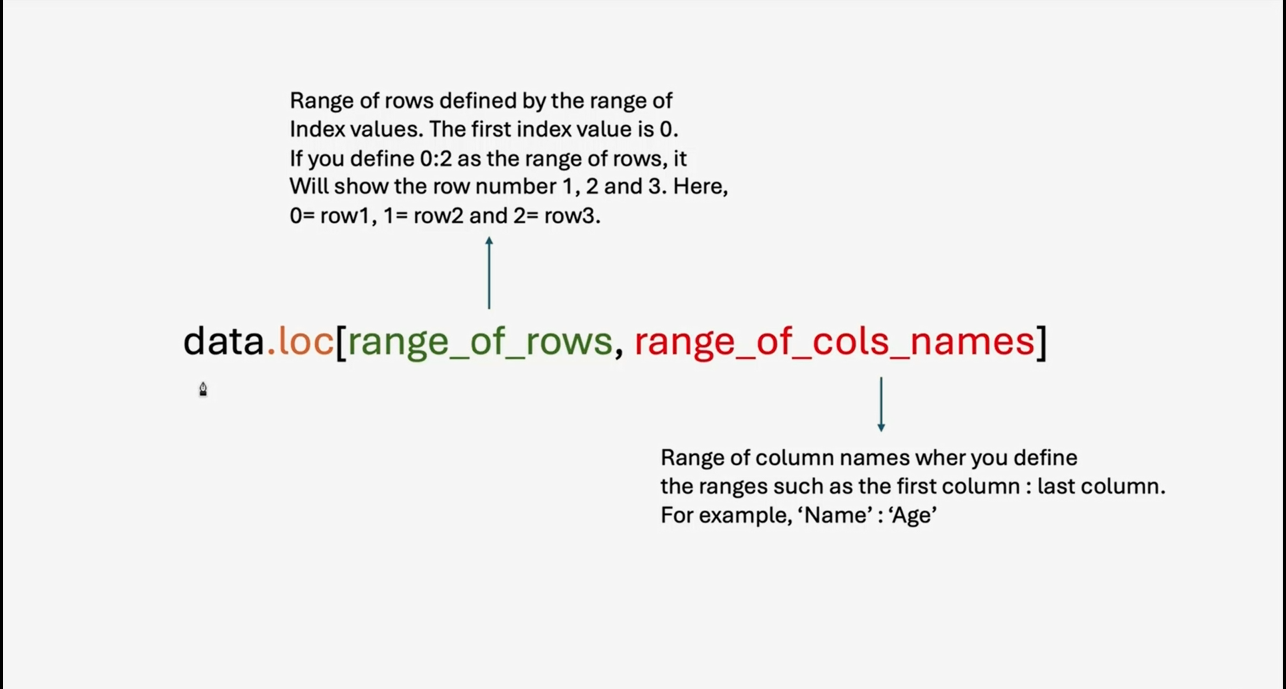

In [ ]:
data.loc[0:4,'CustomerID':'Region']

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


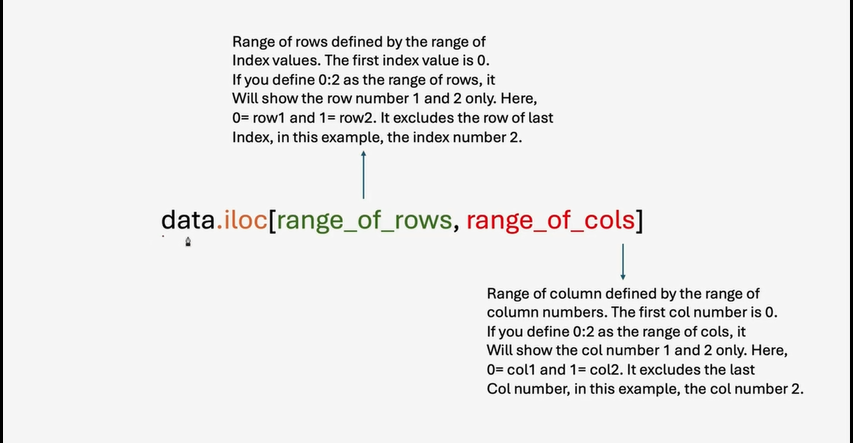

In [ ]:
data.iloc[0:5,0:6]#only use numerical range function

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


**----------Understanding Data Filtering----------**

---

## 🔹 What is Data Filtering?

1. **🎯 Focus on a Relevant Subset of Data**  
   - Isolates rows or columns that meet specific criteria for easier analysis.  

2. **📊 Improve Analysis Clarity**  
   - Removes unnecessary data for clearer and more direct interpretations.  

3. **⚡ Enable Conditional Viewing**  
   - Displays data based on conditions or thresholds for targeted insights.  

4. **🔧 Prepare Data for Deeper Operations**  
   - Sets up datasets for complex processes like aggregations or statistical analyses.  

---

## 🔹 Importance in Data Analysis

1. **🎯 Target Insights**  
   - Helps analysts focus on the most relevant findings.  

2. **🔍 Simplifies Exploration**  
   - Makes it easier to identify trends and patterns in smaller subsets.  

3. **✅ Supports Decision Making**  
   - Enables informed decisions based on filtered, relevant data.  

4. **🧹 Prepares Clean Inputs**  
   - Ensures only clean, relevant data is passed into analysis or models.  

5. **⏱️ Saves Time & Resources**  
   - Smaller datasets reduce computation time and improve efficiency.  




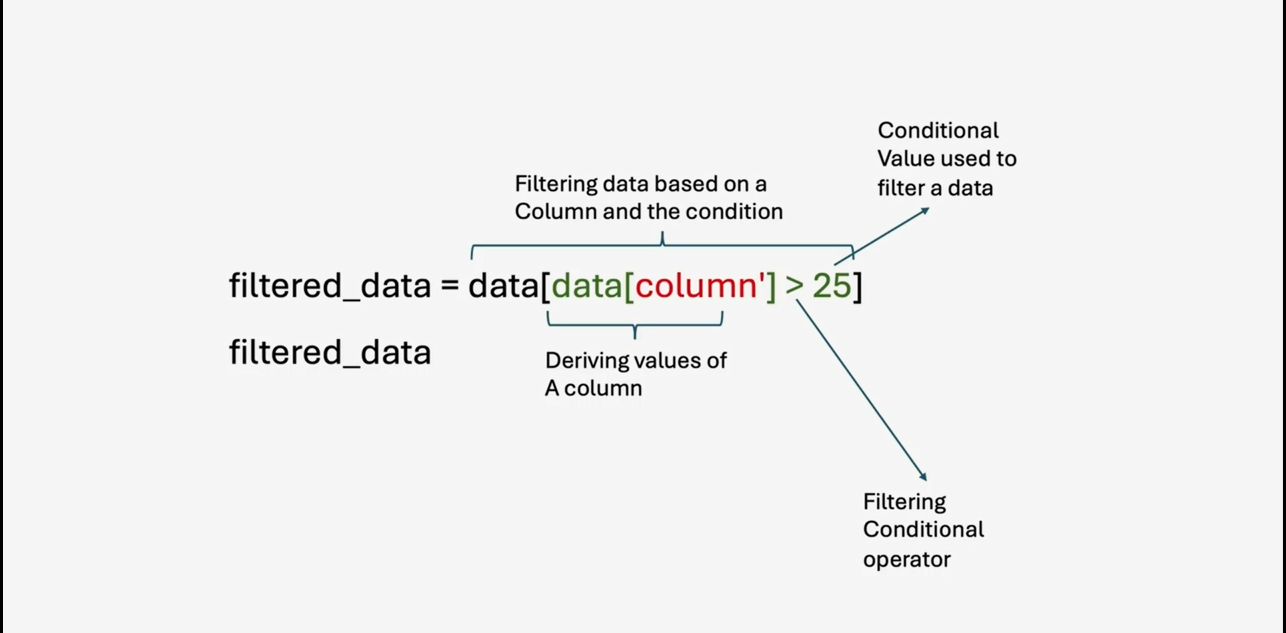

In [ ]:
filtered_data = data[data['Age']>50]
filtered_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
10,C011,Female,53,27958.0,Los Angeles,Midwest,10,98.449,3,In-store,2023-07-16,Yes
23,C024,Male,54,27660.0,New York,Midwest,12,125.763,3,Online,2023-07-11,Yes
29,C030,Female,54,50671.0,Los Angeles,West,13,132.035,4,In-store,2022-11-05,Yes
33,C034,Male,53,78203.0,Houston,Northeast,12,130.277,3,In-store,2023-06-05,Yes
37,C038,Female,54,72700.0,New York,West,2,46.456,1,In-store,2023-03-07,No
41,C042,Male,53,52616.0,Houston,Northeast,11,120.311,3,Online,2022-07-15,Yes
66,C067,Male,54,58033.0,Houston,West,12,128.255,3,Online,2022-03-24,Yes


In [ ]:
filtered_data0 = data[(data['Age']>50)|(data['Frequency_of_Purchases']==10)]
filtered_data0
#or |,and &

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
9,C010,Female,47,65341.0,New York,Northeast,10,108.148,3,In-store,2023-10-03,Yes
10,C011,Female,53,27958.0,Los Angeles,Midwest,10,98.449,3,In-store,2023-07-16,Yes
12,C013,Female,24,45208.0,Chicago,West,10,103.476,3,Online,2023-02-13,Yes
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
23,C024,Male,54,27660.0,New York,Midwest,12,125.763,3,Online,2023-07-11,Yes
27,C028,Female,33,61043.0,Houston,Northeast,10,102.946,3,Online,2022-04-06,Yes
29,C030,Female,54,50671.0,Los Angeles,West,13,132.035,4,In-store,2022-11-05,Yes
33,C034,Male,53,78203.0,Houston,Northeast,12,130.277,3,In-store,2023-06-05,Yes


In [ ]:
male_data = data[data['Gender'] == 'Male']
male_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
7,C008,Male,38,38401.0,Houston,West,6,70.730,2,Online,2022-05-24,No
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes


In [ ]:
male_free_data =male_data[data['Frequency_of_Purchases'] > 5]
male_free_data

/tmp/ipython-input-1397054439.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_free_data =male_data[data['Frequency_of_Purchases'] > 5]


,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
7,C008,Male,38,38401.0,Houston,West,6,70.730,2,Online,2022-05-24,No
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes
18,C019,Male,32,41111.0,Los Angeles,West,14,133.229,4,Online,2023-07-19,Yes
19,C020,Male,28,37050.0,Los Angeles,Midwest,6,71.789,2,Online,2022-04-08,No


In [ ]:
Customer_Lifespan_Months_data=(data['Customer_Lifespan_Months'] >= 2)&(data['Customer_Lifespan_Months'] >= 5)
Customer_Lifespan_Months_data

,Customer_Lifespan_Months
0,False
1,False
2,False
3,False
4,False
...,...
74,False
75,False
77,False
78,False


**----------Understanding Data Merging----------**

---

## 🔹 Why Data Merging is Important

1. **🔗 Combine Multiple Perspectives**  
   - Integrates different datasets for a more complete view.  

2. **📉 Reduce Redundancy**  
   - Minimizes duplicate information for a streamlined dataset.  

3. **📊 Prepare for Analysis**  
   - Ensures all relevant data is available in one view.  

4. **🌐 Integrate from Different Sources**  
   - Merges data from multiple sources for holistic analysis.  

---

## 🔹 Merge Types

1. **📥 Inner Join**  
   - Combines records where there is a match in the join condition.  
   - Non-matching records are excluded.  

2. **⬅️ Left Join**  
   - Keeps all records from the **left** dataset.  
   - Fills with `null` where there’s no match in the right dataset.  

3. **➡️ Right Join**  
   - Keeps all records from the **right** dataset.  
   - Fills with `null` where there’s no match in the left dataset.  

4. **🔄 Outer Join**  
   - Keeps **all** records from both datasets.  
   - Fills with `null` where there’s no match.  

---

## 🔹 How to Avoid Issues in Data Merging

1. **📛 Mismatched Column Names**  
   - Ensure join columns have consistent names in both datasets.  

2. **♻️ Duplicates in Keys**  
   - Remove or handle duplicate key values to prevent unexpected results.  

3. **🚫 Null Values in Join Columns**  
   - Handle missing values in join columns before merging.  

4. **⚖️ Mismatched Data Types**  
   - Match data types of join columns to avoid merge errors.  

5. **📝 Overlapping Column Names**  
   - Rename overlapping columns to prevent ambiguity after merging.  


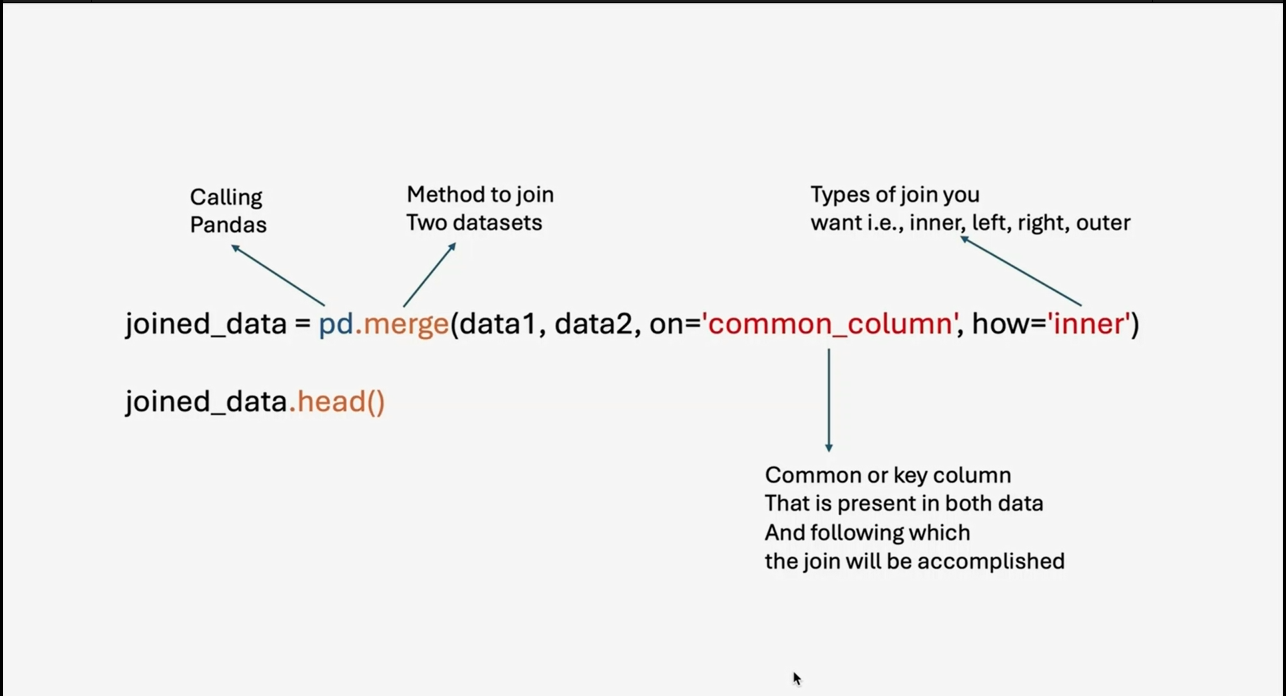

In [ ]:
data1=pd.read_excel('/content/customer_data.xlsx')
data2=pd.read_excel('/content/performance_data.xlsx')
data3=pd.read_excel('/content/additional_data.xlsx')
join_data = pd.merge(data1,data2,on='CustomerID',how='inner')
join_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No,1,1,1


In [ ]:
join_data.shape

(81, 15)

**----------Understanding Data Concatenation----------**

---

## 🔹 Importance of Data Concatenation

1. **📦 Combine Data from Multiple Batches**  
   - Seamlessly integrates data collected in different batches or sessions into one dataset.  

2. **➕ Append New Records**  
   - Easily add new rows to an existing dataset for continuous growth over time.  

3. **📐 Reshape Datasets**  
   - Stack datasets **vertically** (rows) or **horizontally** (columns) as needed for analysis.  

4. **🤖 Prepare Inputs for Analysis or Modeling**  
   - Creates a unified dataset ready for analytics or machine learning models.  

---

## 🔹 Concatenation vs. Merging

### **📏 Concatenation**
- **Definition**: Stacks datasets **vertically** (adding rows) or **horizontally** (adding columns).  
- **Key Point**: Does **not** consider relationships between datasets.  
- **Usage**:  
  - When datasets have the **same structure** (e.g., same columns).  
  - When appending new records.  

### **🔗 Merging**
- **Definition**: Combines datasets based on a **common key** or set of keys.  
- **Key Point**: Preserves relationships between datasets.  
- **Usage**:  
  - When integrating datasets from different sources.  
  - Example: Joining customer data with transaction data.  

---

**✅ Summary**  
- **Concatenation** → Focus on stacking data.  
- **Merging** → Focus on integrating data based on relationships.  


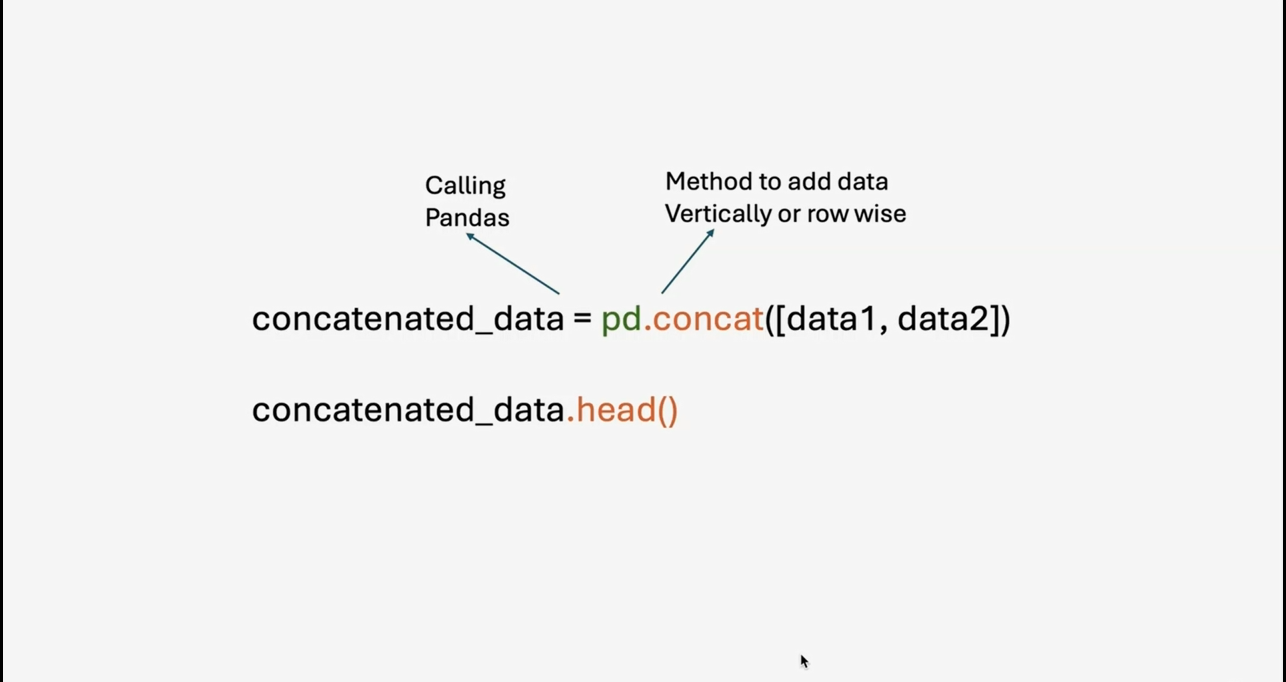

In [ ]:
join_data.shape

(81, 15)

In [ ]:
data3.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,CustomerID.1,Recency,Frequency_Score,Monetary_Score
0,C081,Male,37,50728,Chicago,West,11,75.757,2,In-store,2023-09-10,Yes,C081,2,2,1
1,C082,Female,48,69629,Los Angeles,Midwest,9,78.433,4,In-store,2023-07-15,No,C082,3,4,4
2,C083,Male,28,29184,Chicago,Northeast,7,82.794,3,Online,2023-08-25,Yes,C083,3,1,2
3,C084,Female,33,61265,Los Angeles,West,15,88.490,2,Online,2022-10-22,Yes,C084,4,1,3
4,C085,Female,30,63130,Houston,Midwest,13,108.749,3,Online,2023-04-01,Yes,C085,4,4,1


In [ ]:
Concatenation_data = pd.concat([join_data,data3])
print(join_data.head())
print("---------------------------------------------------------------------")
print(data3.head())
print("---------------------------------------------------------------------")
print(Concatenation_data)
print("---------------------------------------------------------------------")
Concatenation_data.head()

  CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount Customer_Lifespan_Months  \
0                      10                   98.241                        3   
1                      15                  157.640                        4   
2                       1                   41.252                        1   
3                       6                   67.329                        1   
4                       3                   52.763                        1   

  Purchase_Channel Date_of_Purchase Churn_Status  Recency  Frequency_Score  \
0           Online       2022-03-05          Yes        3                2   
1         In-s

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,CustomerID.1
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes,3,2,2,NaN
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes,3,3,3,NaN
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No,4,4,4,NaN
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No,2,2,2,NaN
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No,1,1,1,NaN


In [ ]:
Concatenation_data = pd.concat([join_data,data3]).reset_index()
join_data.tail()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
76,C077,Female,38,94266.0,Los Angeles,Midwest,5,6.308200e+01,XXXX,Online,2023-01-02,No,1,1,1
77,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No,4,4,3
78,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes,1,1,1
79,C080,Female,26,43931.0,Los Angeles,Northeast,9,9.153600e+01,2,In-store,2023-09-18,No,1,1,1
80,C021,Female,22,41743.0,Los Angeles,Northeast,4,5.459900e+01,1,Online,2023-06-08,No,1,2,2


In [99]:
Concatenation_data = pd.concat([join_data,data3]).reset_index(drop=True)
join_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No,1,1,1


In [100]:
Concatenation_data = Concatenation_data.drop('CustomerID.1',axis =1)
join_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No,1,1,1
